In [11]:
import pandas as pd
import matplotlib.pyplot as plt

judgment_file_path = "../data/review/annotation_judgement.csv"

In [12]:
judgement_dataframe = pd.read_csv(judgment_file_path, index_col = 0)
judgement_dataframe['count'] = 1
judgement_dataframe.head(3)

author  question_is_fixable  answer_is_fixable  \
0  reviewer-0                    1                  0   
1  reviewer-0                    0                  0   
2  reviewer-0                    0                  0   

   annotation_is_irrelevant  question_is_correct  answer_is_correct    qid  \
0                         1                    0                  0   5156   
1                         0                    1                  1  11459   
2                         0                    1                  1   9603   

   qlen  rlen    qtype  count  
0    80    84  factual      1  
1    84    69   course      1  
2    57   119   course      1

In [13]:
judgement_dataframe.groupby('author').sum(numeric_only=True)

question_is_fixable  answer_is_fixable  annotation_is_irrelevant  \
author                                                                         
reviewer-0                  293                426                        25   
reviewer-1                  408                429                        73   
reviewer-2                  781               1189                       245   
reviewer-3                  745               1023                        55   
reviewer-4                  294                429                       162   
reviewer-5                  270                505                        33   
reviewer-6                  614                596                      1213   

            question_is_correct  answer_is_correct       qid    qlen    rlen  \
author                                                                         
reviewer-0                  827                672   7585337   81414  220680   
reviewer-1                  761                736   8065943   94205  200745   
reviewer-2                 1279                855  15132918  167074  448336   
reviewer-3                 2976               2712  25026178  271522  730423   
reviewer-4                  572                430   6838080   75459  204569   
reviewer-5                  797                560   7491450   79921  211522   
reviewer-6                 1589               1586  22890044  248358  654655   

            count  
author             
reviewer-0   1143  
reviewer-1   1241  
reviewer-2   2300  
reviewer-3   3799  
reviewer-4   1025  
reviewer-5   1099  
reviewer-6   3414

In [14]:
judgement_dataframe = judgement_dataframe[judgement_dataframe['author'] !=  "reviewer-6"]

In [15]:
#judgement_dataframe = judgement_dataframe[judgement_dataframe['author'] !=  "reviewer-1"]

In [16]:
import numpy as np

In [17]:
print(f"{len(np.unique(judgement_dataframe['qid']))} annotations were evaluated")

9243 annotations were evaluated


In [33]:
judgement_dataframe = judgement_dataframe[judgement_dataframe['author'] !=  "reviewer-1"]

In [34]:
judgement_dataframe.groupby('author').sum(numeric_only=True)

question_is_fixable  answer_is_fixable  annotation_is_irrelevant  \
author                                                                         
reviewer-0                  293                426                        25   
reviewer-2                  781               1189                       245   
reviewer-3                  745               1023                        55   
reviewer-4                  294                429                       162   
reviewer-5                  270                505                        33   

            question_is_correct  answer_is_correct       qid    qlen    rlen  \
author                                                                         
reviewer-0                  827                672   7585337   81414  220680   
reviewer-2                 1279                855  15132918  167074  448336   
reviewer-3                 2976               2712  25026178  271522  730423   
reviewer-4                  572                430   6838080   75459  204569   
reviewer-5                  797                560   7491450   79921  211522   

            count  
author             
reviewer-0   1143  
reviewer-2   2300  
reviewer-3   3799  
reviewer-4   1025  
reviewer-5   1099

In [35]:
qids_common = set((judgement_dataframe.groupby('qid').count()[(judgement_dataframe.groupby('qid').count()['count'] == 5)]).index)
qids_unique = set((judgement_dataframe.groupby('qid').count()[(judgement_dataframe.groupby('qid').count()['count'] == 1)]).index)

In [36]:
common = judgement_dataframe.loc[judgement_dataframe['qid'].isin(qids_common)]
uncommon = judgement_dataframe.loc[judgement_dataframe['qid'].isin(qids_unique)]

In [37]:
f = judgement_dataframe.groupby('qtype').mean(numeric_only=True)[['question_is_correct','question_is_fixable' ,  'answer_is_correct',
'answer_is_fixable', 'annotation_is_irrelevant']] * 100
print(f.to_latex(float_format="{:.1f}".format))

\begin{tabular}{lrrrrr}
\toprule
{} &  question\_is\_correct &  question\_is\_fixable &  answer\_is\_correct &  answer\_is\_fixable &  annotation\_is\_irrelevant \\
qtype      &                      &                      &                    &                    &                           \\
\midrule
course     &                 67.7 &                 26.6 &               52.6 &               41.4 &                       5.5 \\
definition &                 81.1 &                 14.6 &               64.9 &               30.4 &                       4.2 \\
factual    &                 65.4 &                 28.5 &               62.0 &               31.8 &                       5.9 \\
raisoning  &                 65.7 &                 28.1 &               49.4 &               43.5 &                       6.3 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_98467/1267535205.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(f.to_latex(float_format="{:.1f}".format))


In [38]:
print((judgement_dataframe.mean() * 100 ).to_latex(float_format="{:.1f}".format))

\begin{tabular}{lr}
\toprule
{} &        0 \\
\midrule
question\_is\_fixable      &     25.4 \\
answer\_is\_fixable        &     38.1 \\
annotation\_is\_irrelevant &      5.6 \\
question\_is\_correct      &     68.9 \\
answer\_is\_correct        &     55.8 \\
qid                      & 662758.5 \\
qlen                     &   7211.1 \\
rlen                     &  19384.3 \\
count                    &    100.0 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_98467/3710185908.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((judgement_dataframe.mean() * 100 ).to_latex(float_format="{:.1f}".format))
/tmp/ipykernel_98467/3710185908.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print((judgement_dataframe.mean() * 100 ).to_latex(float_format="{:.1f}".format))


In [39]:
common.groupby('author').count()

question_is_fixable  answer_is_fixable  annotation_is_irrelevant  \
author                                                                         
reviewer-0                  192                192                       192   
reviewer-2                  192                192                       192   
reviewer-3                  192                192                       192   
reviewer-4                  192                192                       192   
reviewer-5                  192                192                       192   

            question_is_correct  answer_is_correct  qid  qlen  rlen  qtype  \
author                                                                       
reviewer-0                  192                192  192   192   192    192   
reviewer-2                  192                192  192   192   192    192   
reviewer-3                  192                192  192   192   192    192   
reviewer-4                  192                192  192   192   192    192   
reviewer-5                  192                192  192   192   192    192   

            count  
author             
reviewer-0    192  
reviewer-2    192  
reviewer-3    192  
reviewer-4    192  
reviewer-5    192

## Judging relevance of the annotation
 A first step to correct the corpus rely on judging the relevance of the question and the answer.


In [40]:
# the number of unique queries that have been judged
print("Number of judged annotations : %s annotations"%(len(judgement_dataframe.groupby('qid').sum(numeric_only=True)),))

Number of judged annotations : 8058 annotations


In [41]:
judgement_dataframe_by_qid = common.groupby('qid').sum(numeric_only=True)
n_judged_file = len(judgement_dataframe_by_qid)
criteria = [
    'question_is_fixable',
    'answer_is_fixable',
    'annotation_is_irrelevant',
    'question_is_correct',
    'answer_is_correct'
]
criteria_count = {}

for criterion in criteria :
    is_one_selected = (judgement_dataframe_by_qid[criterion] > 2).sum()
    jall = judgement_dataframe_by_qid[judgement_dataframe_by_qid[criterion] == judgement_dataframe_by_qid["count"]] > 1
    is_all_selected = (jall[criterion] > 0).sum()
    criteria_count[criterion] = {"at_least_one": is_one_selected, "at_least_one %":is_one_selected/n_judged_file, "all": is_all_selected, "all %": is_all_selected/n_judged_file}


In [42]:
criteria_count

{'question_is_fixable': {'at_least_one': 34,
  'at_least_one %': 0.17708333333333334,
  'all': 2,
  'all %': 0.010416666666666666},
 'answer_is_fixable': {'at_least_one': 70,
  'at_least_one %': 0.3645833333333333,
  'all': 4,
  'all %': 0.020833333333333332},
 'annotation_is_irrelevant': {'at_least_one': 5,
  'at_least_one %': 0.026041666666666668,
  'all': 1,
  'all %': 0.005208333333333333},
 'question_is_correct': {'at_least_one': 147,
  'at_least_one %': 0.765625,
  'all': 70,
  'all %': 0.3645833333333333},
 'answer_is_correct': {'at_least_one': 108,
  'at_least_one %': 0.5625,
  'all': 22,
  'all %': 0.11458333333333333}}

In [43]:
from  sklearn.metrics import cohen_kappa_score

In [44]:
# define the fleiss kappa functions
import numpy as np
def fleiss_kappa(X, N, M):
    PJ = (X).sum(axis = 1)/ (N * M)
    PI = ((X**2).sum(axis=0) - N) / (N * (N - 1))
    P = PI.sum()/(M)
    PE = (PJ**2).sum()
    print(P,PE)
    kappa = (P - PE)/(1-PE)
    
    return kappa

def process_all_fleiss_kappa(df, keys):
    result_set = {}
    M = len(df.groupby('qid').sum()) 
    for k in keys:
        mdf = df.copy()
        mdf['NEG'] =  1 - mdf[k]
        mdf['POS'] =   mdf[k]
        N = max(mdf.groupby('qid').sum()['NEG'] + mdf.groupby('qid').sum()['POS'])
        X = np.array([mdf.groupby('qid').sum()['POS'],mdf.groupby('qid').sum()['NEG']])
        print(k)
        result_set[k] = fleiss_kappa(X, N, M)
    return result_set

In [45]:
cc = common[['qid', "question_is_correct", "answer_is_correct", 'qtype']]

In [46]:
cc= cc.sort_values('qid')

In [47]:
cc.groupby('qtype').mean()

qid  question_is_correct  answer_is_correct
qtype                                                          
course      7087.009804             0.676471           0.505882
definition  5402.600000             0.824000           0.640000
factual     6231.055556             0.738889           0.683333
raisoning   7497.896552             0.703448           0.379310

In [48]:

process_all_fleiss_kappa(cc, ["question_is_correct","answer_is_correct"])

question_is_correct
0.7156250000000001 0.5894292534722222
answer_is_correct
0.5927083333333334 0.5028125


/tmp/ipykernel_98467/395008695.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  M = len(df.groupby('qid').sum())
/tmp/ipykernel_98467/395008695.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  N = max(mdf.groupby('qid').sum()['NEG'] + mdf.groupby('qid').sum()['POS'])
/tmp/ipykernel_98467/395008695.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  N = max(mdf.groupby('qid').sum()['NEG'] + mdf.groupby('qid').sum

{'question_is_correct': 0.3073666294908322,
 'answer_is_correct': 0.18080871569243676}

In [49]:
from sklearn.metrics import cohen_kappa_score

In [50]:
common.groupby('author').count()

question_is_fixable  answer_is_fixable  annotation_is_irrelevant  \
author                                                                         
reviewer-0                  192                192                       192   
reviewer-2                  192                192                       192   
reviewer-3                  192                192                       192   
reviewer-4                  192                192                       192   
reviewer-5                  192                192                       192   

            question_is_correct  answer_is_correct  qid  qlen  rlen  qtype  \
author                                                                       
reviewer-0                  192                192  192   192   192    192   
reviewer-2                  192                192  192   192   192    192   
reviewer-3                  192                192  192   192   192    192   
reviewer-4                  192                192  192   192   192    192   
reviewer-5                  192                192  192   192   192    192   

            count  
author             
reviewer-0    192  
reviewer-2    192  
reviewer-3    192  
reviewer-4    192  
reviewer-5    192

In [51]:
ntest=  "answer_is_correct"

evaluators = np.unique(common['author'])
for i in range(len(evaluators)):
    for j in range(i +1, len(evaluators)):
        a = common[common['author'] == evaluators[i]].sort_values('qid')[ntest]
        b = common[common['author'] == evaluators[j]].sort_values('qid')[ntest]
        # print(evaluators[i], evaluators[j],len(a),len(b))
        print(evaluators[i], evaluators[j], cohen_kappa_score(np.array(a), np.array(b)))

reviewer-0 reviewer-2 0.11120908189132594
reviewer-0 reviewer-3 0.21191509323325897
reviewer-0 reviewer-4 0.398981324278438
reviewer-0 reviewer-5 0.29567131327953033
reviewer-2 reviewer-3 0.1103903625622612
reviewer-2 reviewer-4 0.049403747870528036
reviewer-2 reviewer-5 0.028974818248867495
reviewer-3 reviewer-4 0.2082670906200319
reviewer-3 reviewer-5 0.18034342092780575
reviewer-4 reviewer-5 0.3793103448275862


For this evaluation we obtained (in criteria_count): 

| Criterion | ALO | T |
| -------- | ------------------ | ------------ |
| QC | 7833 (69.5%) | 6817 (60.4%) |
| QR | 3193 (28.3%) | 2524 (22.4%) |
| QI | 1698 (15.0%) | 500 (4.4%) |
| AC | 6830 (60.6%) | 5783 (51.3%) |
| AR | 4219 (37.4%) | 3469 (30.8%)|


## Does correctness of an annotation correlate with the size of the question or the answer?

To understand criteria we conducted small experiments, particularly to estimate how criteria correlate to questions or answers structures.

In [52]:
import numpy as np


### Investigate question length 

In [53]:
sorted_by_len = judgement_dataframe.sort_values('qlen')
x = sorted_by_len['qlen']
y = sorted_by_len['question_is_fixable']
div = 10
nb = len(x)//div
plot_data = {}
limit_to_criteria = [
    'question_is_correct',
    'answer_is_correct'
]
for criterion in limit_to_criteria: 
    x = sorted_by_len['qlen']
    y = sorted_by_len[criterion]
    mx, my = [], []
    for i in range(div):
        mx.append(x[i * nb: (i+1) * nb].mean())
        my.append(y[i * nb: (i+1) * nb].mean())
    plot_data[criterion] = {"x": mx, "y": my}


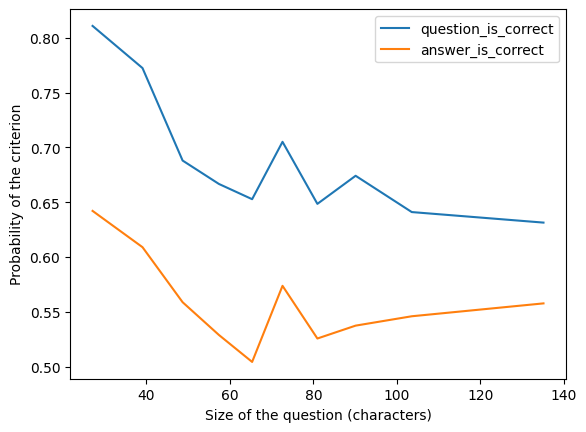

In [54]:

fig, ax = plt.subplots()
for k, v in plot_data.items():
    ax.plot(v['x'], v['y'], label = k)
plt.xlabel("Size of the question (characters)")
plt.ylabel("Probability of the criterion")
plt.legend()
#plt.show()
plt.savefig('../figures/correctness_question-size.svg', format='svg')

### Investigate answer length 

In [130]:
import numpy as np
sorted_by_len = judgement_dataframe.sort_values('rlen')
div = 10
nb = len(x)//div
plot_data = {}
limit_to_criteria = [
    'question_is_correct',
    'answer_is_correct'
]
for criterion in limit_to_criteria: 
    x = sorted_by_len['rlen']
    y = sorted_by_len[criterion]
    mx, my = [], []
    for i in range(div):
        mx.append(x[i * nb: (i+1) * nb].mean())
        my.append(y[i * nb: (i+1) * nb].mean())
    plot_data[criterion] = {"x": mx, "y": my}


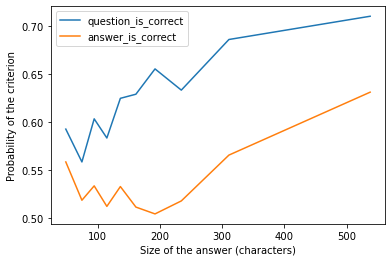

In [131]:

fig, ax = plt.subplots()
for k, v in plot_data.items():
    ax.plot(v['x'], v['y'], label = k)
plt.xlabel("Size of the answer (characters)")
plt.ylabel("Probability of the criterion")
plt.legend()
#plt.show()
plt.savefig('../figures/correctness_answer-size.svg', format='svg')

### Does answer length correlate to question length ?

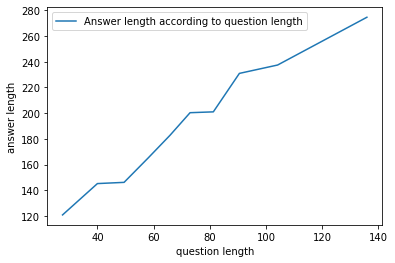

In [155]:
sorted_by_len = judgement_dataframe.sort_values('qlen')
x = sorted_by_len['qlen']
y = sorted_by_len['rlen']
my, mx = [], []
div = 10
nb = len(x)//div
for i in range(div):
    mx.append(x[i * nb: (i+1) * nb].mean())
    my.append(y[i * nb: (i+1) * nb].mean())

fig, ax = plt.subplots()

ax.plot(mx, my, label = "Answer length according to question length")
plt.xlabel("question length")
plt.ylabel("answer length")
plt.legend()
plt.savefig('../figures/corelation_qlen_rlen.svg', format='svg')

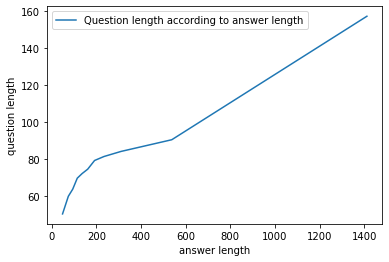

In [143]:
sorted_by_len = judgement_dataframe.sort_values('rlen')
x = sorted_by_len['qlen']
y = sorted_by_len['rlen']
my, mx = [], []

for i in range(div):
    mx.append(x[i * nb: (i+1) * nb].mean())
    my.append(y[i * nb: (i+1) * nb].mean())

fig, ax = plt.subplots()

ax.plot(my, mx, label = "Question length according to answer length")
plt.ylabel("question length")
plt.xlabel("answer length")
plt.legend()
plt.savefig('../figures/corelation_rlen_qlen.svg', format='svg')